# Deep Learninf from Screatch Vol5




## Chap 0. Reference :
- https://github.com/WegraLee/deep-learning-from-scratch-5
- https://github.com/oreilly-japan/deep-learning-from-scratch-5

## Chap 1 : Normal distribution

- $N(x; μ, σ) = \frac{1}{ \sqrt{2π} σ} exp \bigl( - \frac{(x - μ)^2}{2 σ^{2}}\bigr)$


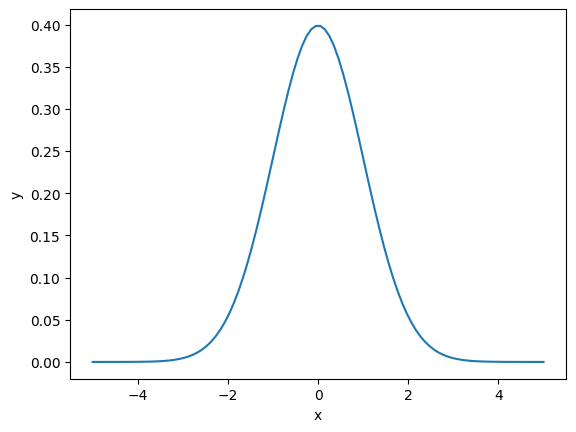

In [ ]:
# @title 1.1. Normal distribution

import numpy as np
import matplotlib.pyplot as plt

def normal(x, mu=0, sigma=1):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y

x = np.linspace(-5, 5, 100)
y = normal(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

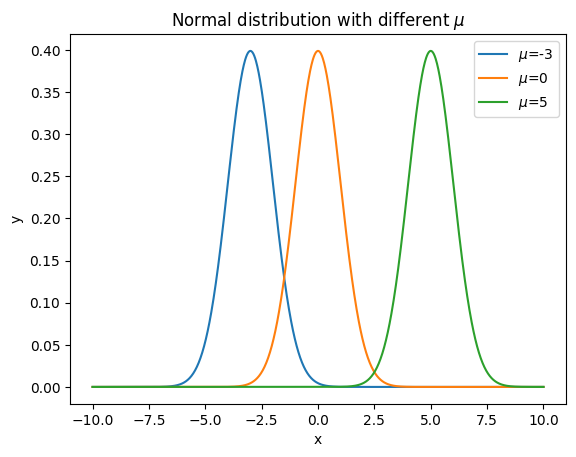

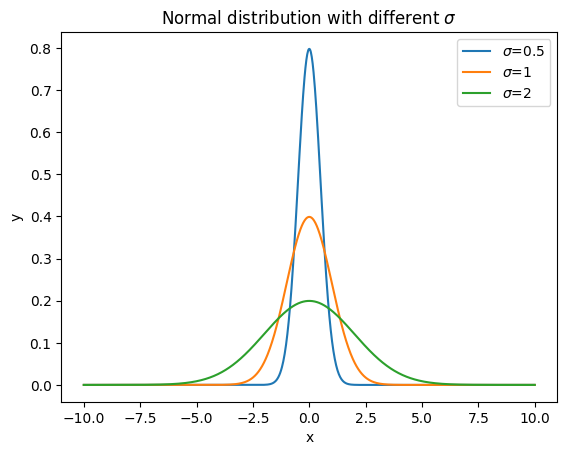

In [ ]:
# @title 1.2. Normal distribution with parameters

import numpy as np
import matplotlib.pyplot as plt

def normal(x, mu=0, sigma=1):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y

x = np.linspace(-10, 10, 1000)

# mu ====================
y0 = normal(x, mu=-3)
y1 = normal(x, mu=0)
y2 = normal(x, mu=5)

plt.plot(x, y0, label='$\mu$=-3')
plt.plot(x, y1, label='$\mu$=0')
plt.plot(x, y2, label='$\mu$=5')
plt.title('Normal distribution with different $\mu$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# sigma ====================
y0 = normal(x, mu=0, sigma=0.5)
y1 = normal(x, mu=0, sigma=1)
y2 = normal(x, mu=0, sigma=2)


plt.plot(x, y0, label='$\sigma$=0.5')
plt.plot(x, y1, label='$\sigma$=1')
plt.plot(x, y2, label='$\sigma$=2')
plt.title('Normal distribution with different $\sigma$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

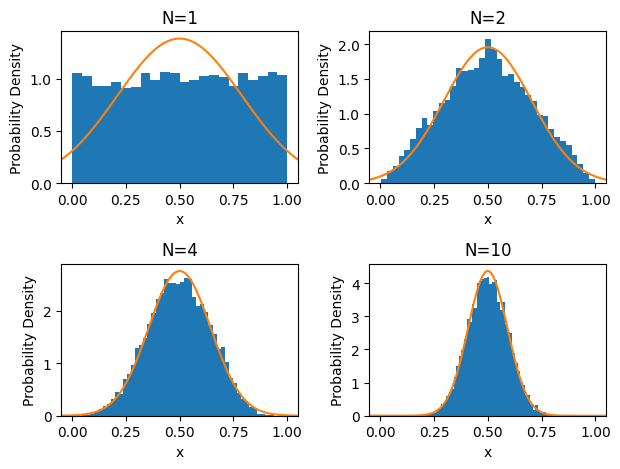

In [ ]:
# @title 1.3 Cental Limit theorem code : Sample - mean
# @markdown Ref : https://en.wikipedia.org/wiki/Central_limit_theorem

import numpy as np
import matplotlib.pyplot as plt

# normal distribution
def normal(x, mu=0, sigma=1):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y

fig, axs = plt.subplots(2, 2)


def draw_histogram(r, c, N):
    x_means = []

    for _ in range(10000):
        xs = []
        for i in range(N):
            # @markdown - Generate random values from Uniform Distribution : [NumPy](https://numpy.org/doc/2.1/reference/random/generated/numpy.random.rand.html)
            x = np.random.rand()
            xs.append(x)
        mean = np.mean(xs)
        x_means.append(mean)

    # plot
    axs[r, c].hist(x_means, bins='auto', density=True)
    axs[r, c].set_title(f'N={N}')
    axs[r, c].set_xlabel('x')
    axs[r, c].set_ylabel('Probability Density')
    axs[r, c].set_xlim(-0.05, 1.05)
    # axs[r, c].set_ylim(0, 5)
    x_norm = np.linspace(-5, 5, 1000)
    mu = 0.5
    sigma = np.sqrt(1 / (12 * N))
    y_norm = normal(x_norm, mu, sigma)
    axs[r, c].plot(x_norm, y_norm)


draw_histogram(0, 0, 1)
draw_histogram(0, 1, 2)
draw_histogram(1, 0, 4)
draw_histogram(1, 1, 10)
fig.tight_layout()
fig.show()



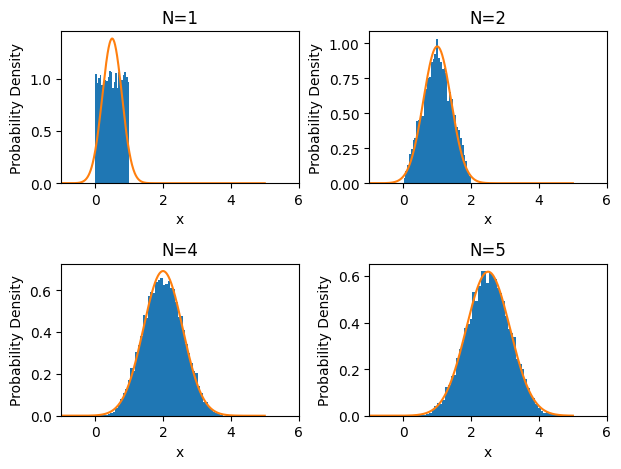

In [ ]:
# @title 1.4 Cental Limit theorem code : Sample - Sum

# normal distribution
def normal(x, mu=0, sigma=1):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y

fig, axs = plt.subplots(2, 2)

def draw_histogram(r, c, N):
    x_sums = []

    for _ in range(10000):
        xs = []
        for i in range(N):
            x = np.random.rand()
            xs.append(x)
        sum_v = np.sum(xs)
        x_sums.append(sum_v)

    x_norm = np.linspace(-5, 5, 1000)
    mu = 0.5 * N
    sigma = np.sqrt(1 / 12 * N)
    y_norm = normal(x_norm, mu, sigma)

    # plot
    axs[r, c].hist(x_sums, bins='auto', density=True)
    axs[r, c].set_title(f'N={N}')
    axs[r, c].set_xlabel('x')
    axs[r, c].set_ylabel('Probability Density')
    axs[r, c].set_xlim(-1, 6)
    axs[r, c].plot(x_norm, y_norm)

draw_histogram(0, 0, 1)
draw_histogram(0, 1, 2)
draw_histogram(1, 0, 4)
draw_histogram(1, 1, 5)
fig.tight_layout()
fig.show()

## Chap 2: Maximum Likelihood Estimation (MLE)

In [ ]:
# @title 2.2.0 Download Data
!wget https://raw.githubusercontent.com/oreilly-japan/deep-learning-from-scratch-5/f69d0921dd852c0ef7752556d2d6b23f28de8947/step02/height.txt

--2025-04-28 21:33:37--  https://raw.githubusercontent.com/oreilly-japan/deep-learning-from-scratch-5/f69d0921dd852c0ef7752556d2d6b23f28de8947/step02/height.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 275000 (269K) [text/plain]
Saving to: ‘height.txt’

height.txt          100%[===================>] 268.55K  --.-KB/s    in 0.04s   

2025-04-28 21:33:38 (6.93 MB/s) - ‘height.txt’ saved [275000/275000]



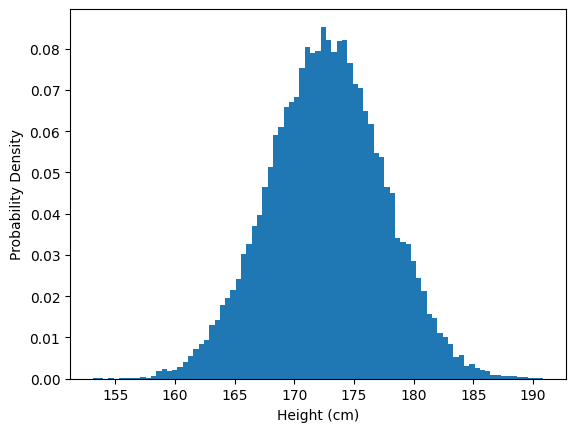

In [ ]:
# @title 2.2.1 Histogram of Data
import numpy as np
import matplotlib.pyplot as plt

heights = np.loadtxt('height.txt')

plt.hist(heights, bins='auto', density=True)
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.show()


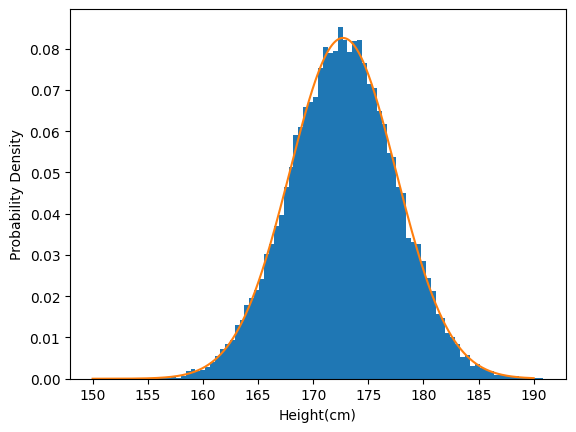

In [ ]:
# @title  2.2.2 Fitting a normal distribution with Data

path = 'height.txt'
xs = np.loadtxt(path)

mu = np.mean(xs)
sigma = np.std(xs)

# normal distribution
def normal(x, mu=0, sigma=1):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y
x = np.linspace(150, 190, 1000)
y = normal(x, mu, sigma)

# plot
plt.hist(xs, bins='auto', density=True)
plt.plot(x, y)
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.show()

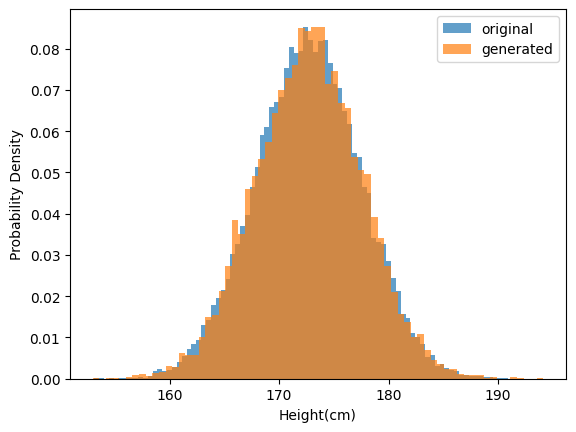

In [ ]:
# @title 2.4.1 Generated data with the fitted normal distribution

import os
import numpy as np

path = 'height.txt'
xs = np.loadtxt(path)
mu = np.mean(xs)
sigma = np.std(xs)

samples = np.random.normal(mu, sigma, 10000)

plt.hist(xs, bins='auto', density=True, alpha=0.7, label='original')
plt.hist(samples, bins='auto', density=True, alpha=0.7, label='generated')
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [ ]:
# @title 2.4.2 Probability from continuous distribution
import numpy as np
from scipy.stats import norm


path = 'height.txt'
xs = np.loadtxt(path)
mu = np.mean(xs)
sigma = np.std(xs)

p1 = norm.cdf(160, mu, sigma)
print('p(x <= 160):', p1)

p2 = norm.cdf(180, mu, sigma)
print('p(x > 180):', 1-p2)

p(x <= 160): 0.004271406830855
p(x > 180): 0.06541774339950823


## Chap 3. Multivariate normal distribution

- $N(x; μ, Σ) = \frac{1}{ \sqrt{(2π)^D}|Σ|} exp \bigl( - \frac{1}{2}(x - μ)^TΣ^{-1}(x-\mu)\bigr)$

In [ ]:
# @title 3.1 NumPy

# array
print("\n**1-D Arrary")
x = np.array([1, 2, 3])
print(x.__class__)
print(x.shape)
print(x.ndim)

##
print("\n**2-D Arrary")
W = np.array([[1, 2, 3],
              [4, 5, 6]])
print(W.ndim)
print(W.shape)

# element-wise operation
print("\n**Element-wise operation")
W = np.array([[1, 2, 3], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])
print(W + X)
print('---')
print(W * X)

# inner product
print("\n**Inner product")
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
y = np.dot(a, b)  # a @ b
print("a.shape: ", a.shape)
print("b.shape: ", b.shape)
print("y.shape: ", y.shape)
print(y)

print("\n**Inner product")
a = np.array([[1, 2, 3]])
b = np.array([4, 5, 6])
y = np.dot(a, b)  # a @ b
print("a.shape: ", a.shape)
print("b.shape: ", b.shape)
print("y.shape: ", y.shape)
print(y)

print("\n**Inner product")
a = np.array([[1, 2, 3]])
b = np.array([[4], [5], [6]])
y = np.dot(a, b)  # a @ b
print("a.shape: ", a.shape)
print("b.shape: ", b.shape)
print("y.shape: ", y.shape)
print(y)

# matrix multiplication
print("\n**Matrix multiplication")
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
Y = np.dot(A, B)  # A @ B
print("A.shape: ", A.shape)
print("B.shape: ", B.shape)
print("Y.shape: ", Y.shape)
print(Y)


**1-D Arrary
<class 'numpy.ndarray'>
(3,)
1

**2-D Arrary
2
(2, 3)

**Element-wise operation
[[ 1  3  5]
 [ 7  9 11]]
---
[[ 0  2  6]
 [12 20 30]]

**Inner product
a.shape:  (3,)
b.shape:  (3,)
y.shape:  ()
32

**Inner product
a.shape:  (1, 3)
b.shape:  (3,)
y.shape:  (1,)
[32]

**Inner product
a.shape:  (1, 3)
b.shape:  (3, 1)
y.shape:  (1, 1)
[[32]]

**Matrix multiplication
A.shape:  (2, 2)
B.shape:  (2, 2)
Y.shape:  (2, 2)
[[19 22]
 [43 50]]


In [ ]:
# @title 3.2 Numpy Matrix
import numpy as np

# transpose
print("\n**Transpose")
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A)
print('---')
print(A.T)

# determinant
print("\n**Determinant")
A = np.array([[3, 4], [5, 6]])
d = np.linalg.det(A)
print(A)
print('---')
print(d)

# inverse matrix
print("\n**Inverse matrix")
A = np.array([[0.5, 1.0], [2.0, 3.0]])
B = np.linalg.inv(A)
print(A)
print(B)
print('---')
print(A @ B)

# multivariate normal distribution
print("\n**Multivariate normal distribution")
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

x = np.array([0, 0])
mu = np.array([1, 2])
cov = np.array([[1, 0],
               [0, 1]])

y = multivariate_normal(x, mu, cov)
print(y)


**Transpose
[[1 2 3]
 [4 5 6]]
---
[[1 4]
 [2 5]
 [3 6]]

**Determinant
[[3 4]
 [5 6]]
---
-1.9999999999999971

**Inverse matrix
[[0.5 1. ]
 [2.  3. ]]
[[-6.  2.]
 [ 4. -1.]]
---
[[1. 0.]
 [0. 1.]]

**Multivariate normal distribution
0.013064233284684921


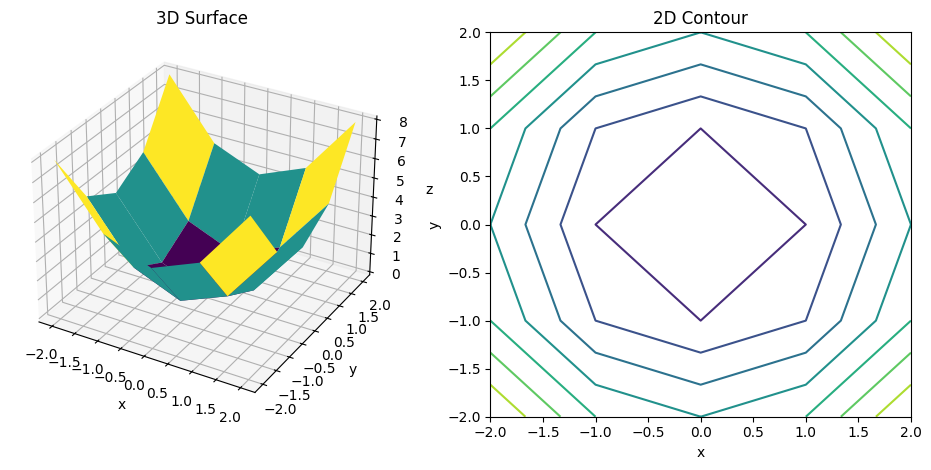

In [ ]:
# @title 3.3.1 3D plot-1
X = np.array([[-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2]])
Y = np.array([[-2, -2, -2, -2, -2],
              [-1, -1, -1, -1, -1],
              [0, 0, 0, 0, 0],
              [1, 1, 1, 1, 1],
              [2, 2, 2, 2, 2]])

# ===== better resolution =====
# x = y = np.arange(-2, 2, 0.1)
# X, Y = np.meshgrid(x, y)
# =============================

Z = X ** 2 + Y ** 2

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title("3D Surface")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax = fig.add_subplot(122)
ax.contour(X, Y, Z)
ax.set_title("2D Contour")
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.tight_layout()
fig.show()



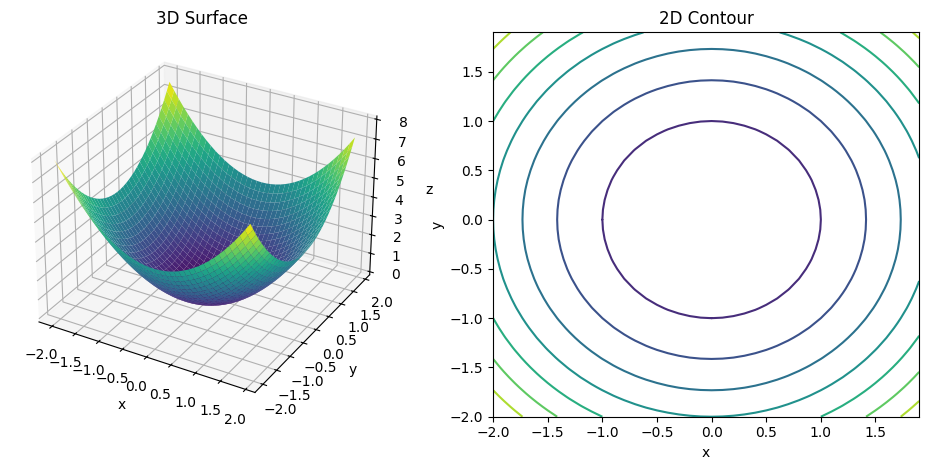

In [ ]:
# @title 3.3.1 3D plot-2
# ===== better resolution =====
x = y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(x, y)
# =============================

Z = X ** 2 + Y ** 2

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title("3D Surface")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax = fig.add_subplot(122)
ax.contour(X, Y, Z)
ax.set_title("2D Contour")
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.tight_layout()
fig.show()

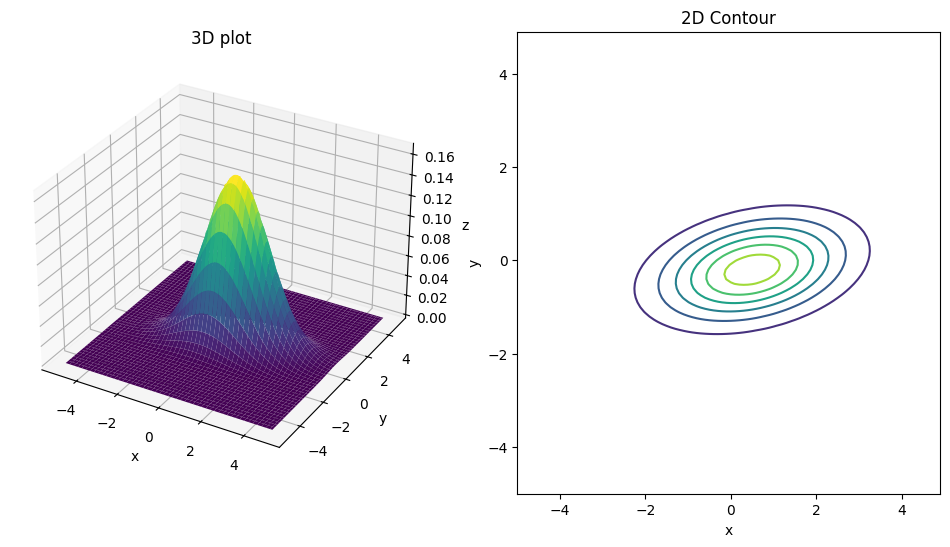

In [ ]:
# @title 3.3.3 2D Normal distribution
# @markdown - $N(x; μ, Σ) = \frac{1}{ \sqrt{(2π)^D}|Σ|} exp \bigl( - \frac{1}{2}(x - μ)^TΣ^{-1}(x-\mu)\bigr)$

import numpy as np
import matplotlib.pyplot as plt

def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(x)
    z = 1/np.sqrt((2*np.pi) ** D * det)
    # y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

mu = np.array([0.5, -0.2])
cov = np.array([[2.0, 0.3],
                [0.3, 0.5]])

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title("3D plot")
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
ax2.set_title("2D Contour")
plt.show()

In [ ]:
# @title 3.4.2 Maximum Likelihood Estimation (MLE)
# @markdown $\hat{\mu} = \frac{1}{N}\Sigma_{n=1}^{N}x^{(n)}$

# @markdown $\hat{\Sigma} = \frac{1}{N}\Sigma_{n=1}^{N}(x^{(n)}- \hat{\mu}))(x^{(n)}- \hat{\mu})^T)$

import numpy as np

np.random.seed(0)
N = 10000
D = 2
xs = np.random.rand(N, D)

mu = np.sum(xs, axis=0)
mu /= N

cov = 0
for n in range(N):
    x = xs[n]
    z = x - mu
    z = z[:, np.newaxis]
    c = z @ z.T
    cov += z @z.T

cov /= N

print("\n***Using functions")
print(mu)
print(cov)

print("\n***Using NumPy functions")
print(np.mean(xs, axis=0))
print(np.cov(xs, rowvar=False))
# print(np.cov(xs, rowvar=True))



***Using functions
[0.49443495 0.49726356]
[[ 0.08476319 -0.00023128]
 [-0.00023128  0.08394656]]

***Using NumPy functions
[0.49443495 0.49726356]
[[ 0.08477167 -0.0002313 ]
 [-0.0002313   0.08395496]]


--2025-04-28 23:48:22--  https://raw.githubusercontent.com/oreilly-japan/deep-learning-from-scratch-5/refs/heads/main/step03/height_weight.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 525000 (513K) [text/plain]
Saving to: ‘height_weight.txt’

height_weight.txt   100%[===================>] 512.70K  --.-KB/s    in 0.05s   

2025-04-28 23:48:22 (10.4 MB/s) - ‘height_weight.txt’ saved [525000/525000]

(25000, 2)


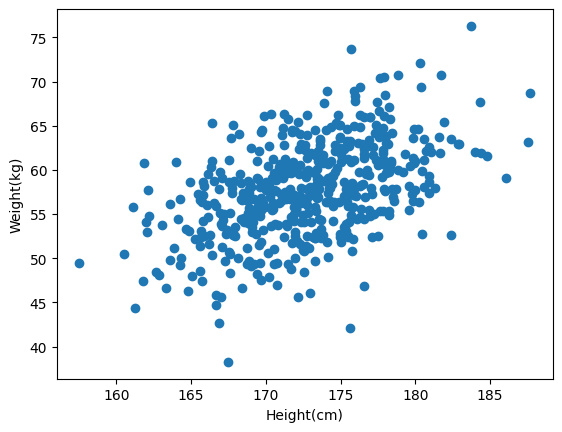

In [ ]:
# @title 3.4.3 Plot Height-Weight Dataset

!wget https://raw.githubusercontent.com/oreilly-japan/deep-learning-from-scratch-5/refs/heads/main/step03/height_weight.txt

import numpy as np
import matplotlib.pyplot as plt

path = 'height_weight.txt'
xs = np.loadtxt(path)

print(xs.shape)

small_xs = xs[:500]
plt.scatter(small_xs[:, 0], small_xs[:, 1])
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')
plt.show()

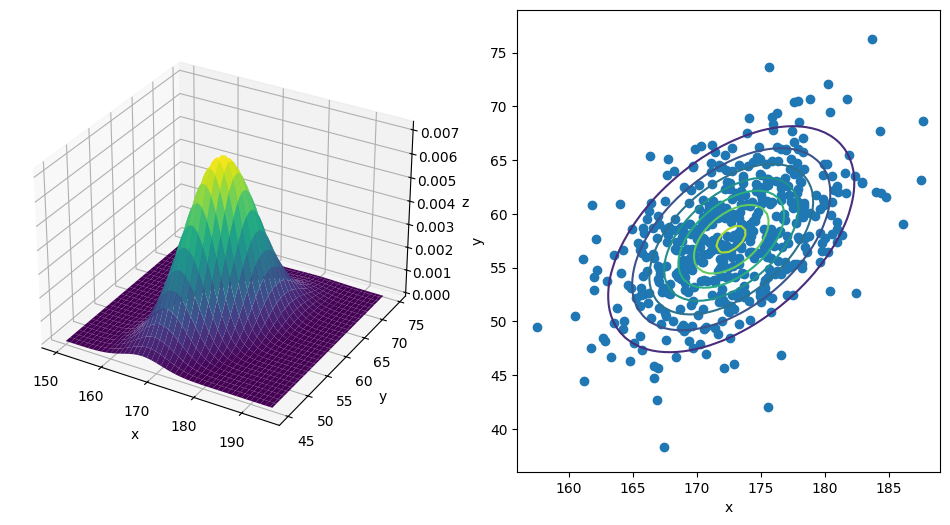

In [ ]:
# @title 3.4.3 MLE for Height-Weight Dataset

import numpy as np
import matplotlib.pyplot as plt

path = 'height_weight.txt'
xs = np.loadtxt(path)

# Maximum Likelihood Estimation(MLE)
mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)

def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** d * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

small_xs = xs[:500]
X, Y = np.meshgrid(np.arange(150, 195, 0.5),
                   np.arange(45, 75, 0.5))
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(small_xs[:,0], small_xs[:,1]) # From loaded data
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(156, 189)
ax2.set_ylim(36, 79)
ax2.contour(X, Y, Z) # From estimated normal distribution
plt.show()

## Chap 4. Gaussian Mixture Model

--2025-04-29 00:03:29--  https://raw.githubusercontent.com/oreilly-japan/deep-learning-from-scratch-5/main/step04/old_faithful.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2253 (2.2K) [text/plain]
Saving to: ‘old_faithful.txt’

old_faithful.txt    100%[===================>]   2.20K  --.-KB/s    in 0s      

2025-04-29 00:03:29 (28.1 MB/s) - ‘old_faithful.txt’ saved [2253/2253]

(272, 2)
[ 3.6 79. ]
[ 1.8 54. ]


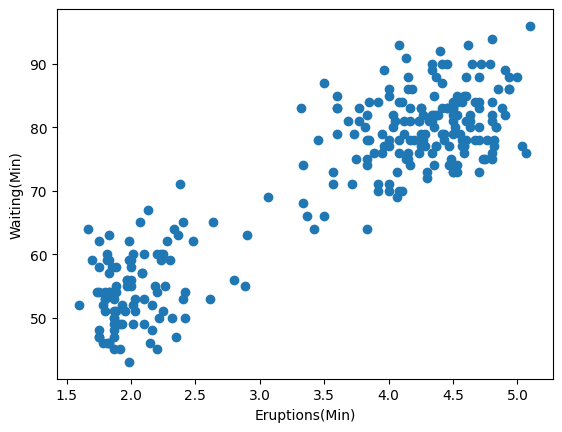

In [ ]:
# @title 4.1 Load Old-Faithful data
!wget https://raw.githubusercontent.com/oreilly-japan/deep-learning-from-scratch-5/main/step04/old_faithful.txt

import numpy as np
import matplotlib.pyplot as plt

path = 'old_faithful.txt'
xs = np.loadtxt(path)

print(xs.shape)
print(xs[0])
print(xs[1])

plt.scatter(xs[:,0], xs[:,1])
plt.xlabel('Eruptions(Min)')
plt.ylabel('Waiting(Min)')
plt.show()

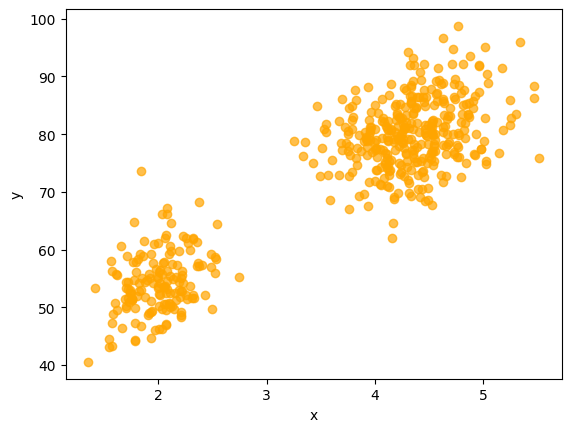

In [ ]:
# @title 4.2.1 GMM-Sampling

import numpy as np
import matplotlib.pyplot as plt


mus = np.array([[2.0, 54.50],
                [4.3, 80.0]])
covs = np.array([[[0.07, 0.44],
                  [0.44, 33.7]],
                 [[0.17, 0.94],
                  [0.94, 36.00 ]]])
phis = np.array([0.35, 0.65])


def sample():
    k = np.random.choice(2, p=phis)
    mu, cov = mus[k], covs[k]
    x = np.random.multivariate_normal(mu, cov)
    return x

N = 500
xs = np.zeros((N, 2))
for i in range(N):
     xs[i] = sample()

plt.scatter(xs[:,0], xs[:,1], color='orange', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

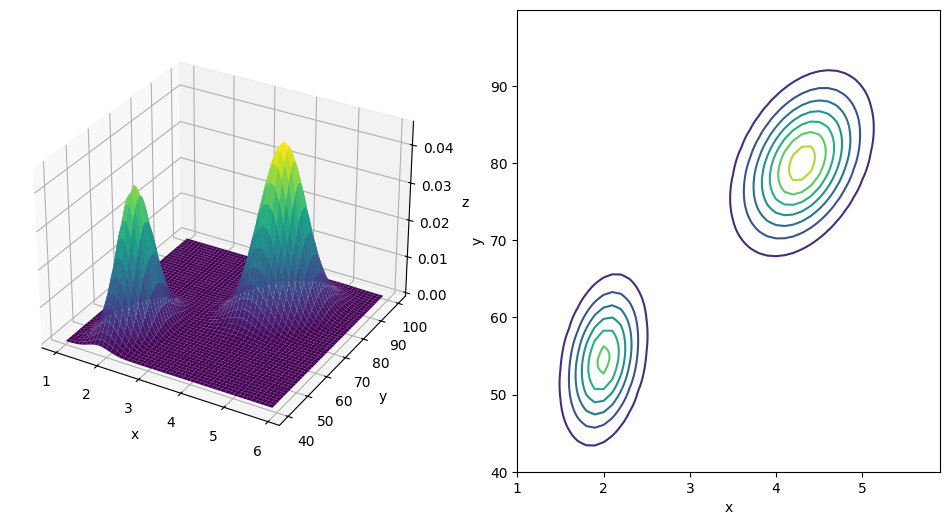

In [ ]:
# @title 4.3.3 GMM

# @markdown Categorical distribution : $p(x = k, \phi) = \phi_k$

# @markdown $p(x) = \Sigma^K_{k=1}p(x, z=k)$



# @markdown $p(x) = \Sigma^K_{k=1}ϕ_kN(x;\mu_k, \sigma_k)$


import numpy as np
import matplotlib.pyplot as plt


mus = np.array([[2.0, 54.50],
                [4.3, 80.0]])
covs = np.array([[[0.07, 0.44],
                  [0.44, 33.7]],
                 [[0.17, 0.94],
                  [0.94, 36.00 ]]])
phis = np.array([0.35, 0.65])


def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** d * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

def gmm(x, phis, mus, covs):
    K = len(phis)
    y = 0
    for k in range(K):
        phi, mu, cov = phis[k], mus[k], covs[k]
        y += phi * multivariate_normal(x, mu, cov)
    return y


# plot
xs = np.arange(1, 6, 0.1)
ys = np.arange(40, 100, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = gmm(x, phis, mus, covs)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
plt.show()

## Chap 5. Expectation-Maximization


In [ ]:
# @title 5.1.2 Kullback-Leibler divergence

# @markdown $D_{KL}(p ||q) = \int p(x) log \frac{p(x)}{q(x)}dx$

# @markdown $D_{KL}(p ||q) = \sum p(x) log \frac{p(x)}{q(x)}$

--2025-04-29 07:13:43--  https://raw.githubusercontent.com/oreilly-japan/deep-learning-from-scratch-5/main/step04/old_faithful.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2253 (2.2K) [text/plain]
Saving to: ‘old_faithful.txt.1’

old_faithful.txt.1  100%[===================>]   2.20K  --.-KB/s    in 0s      

2025-04-29 07:13:43 (34.0 MB/s) - ‘old_faithful.txt.1’ saved [2253/2253]

(272, 2)
-16.538
-4.415
-4.357
-4.302
-4.245
-4.200
-4.164
-4.156
-4.155


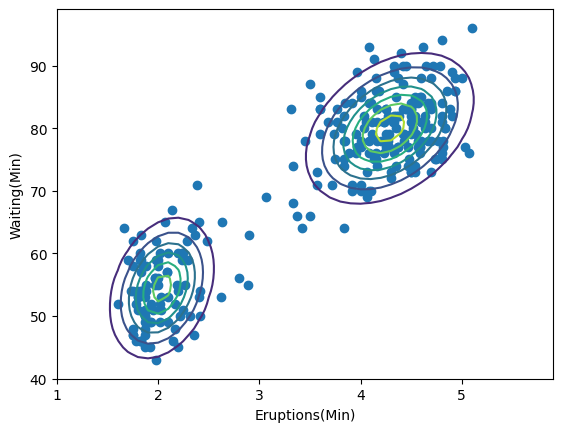

In [ ]:
# @title 5.5.1 EM for GMM

!wget https://raw.githubusercontent.com/oreilly-japan/deep-learning-from-scratch-5/main/step04/old_faithful.txt

import numpy as np
import matplotlib.pyplot as plt

path = 'old_faithful.txt'
xs = np.loadtxt(path)
print(xs.shape) # (272, 2)

# initialize parameters
phis = np.array([0.5, 0.5])
mus = np.array([[0.0, 50.0], [0.0, 100.0]])
covs = np.array([np.eye(2), np.eye(2)])

K = len(phis)  # 2
N = len(xs)    # 272
MAX_ITERS = 100
THRESHOLD = 1e-4

def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** d * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

def gmm(x, phis, mus, covs):
    K = len(phis)
    y = 0
    for k in range(K):
        phi, mu, cov = phis[k], mus[k], covs[k]
        y += phi * multivariate_normal(x, mu, cov)
    return y

def likelihood(xs, phis, mus, covs):
    """ log likelihood """
    eps = 1e-8
    L = 0
    N = len(xs)
    for x in xs:
        y = gmm(x, phis, mus, covs)
        L += np.log(y + eps)
    return L / N


current_likelihood = likelihood(xs, phis, mus, covs)

for iter in range(MAX_ITERS):
    # E-step ====================
    qs = np.zeros((N, K))
    for n in range(N):
        x = xs[n]
        for k in range(K):
            phi, mu, cov = phis[k], mus[k], covs[k]
            qs[n, k] = phi * multivariate_normal(x, mu, cov)
        qs[n] /= gmm(x, phis, mus, covs)

    # M-step ====================
    qs_sum = qs.sum(axis=0)
    for k in range(K):
        # 1. phis
        phis[k] = qs_sum[k] / N

        # 2. mus
        c = 0
        for n in range(N):
            c += qs[n, k] * xs[n]
        mus[k] = c / qs_sum[k]

        # 3. covs
        c = 0
        for n in range(N):
            z = xs[n] - mus[k]
            z = z[:, np.newaxis]  # column vector
            c += qs[n, k] * z @ z.T
        covs[k] = c / qs_sum[k]

    # thershold check ====================
    print(f'{current_likelihood:.3f}')

    next_likelihood = likelihood(xs, phis, mus, covs)
    diff = np.abs(next_likelihood - current_likelihood)
    if diff < THRESHOLD:
        break
    current_likelihood = next_likelihood



# visualize
def plot_contour(w, mus, covs):
    x = np.arange(1, 6, 0.1)
    y = np.arange(40, 100, 1)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            x = np.array([X[i, j], Y[i, j]])

            for k in range(len(mus)):
                mu, cov = mus[k], covs[k]
                Z[i, j] += w[k] * multivariate_normal(x, mu, cov)
    plt.contour(X, Y, Z)

plt.scatter(xs[:,0], xs[:,1])
plot_contour(phis, mus, covs)
plt.xlabel('Eruptions(Min)')
plt.ylabel('Waiting(Min)')
plt.show()

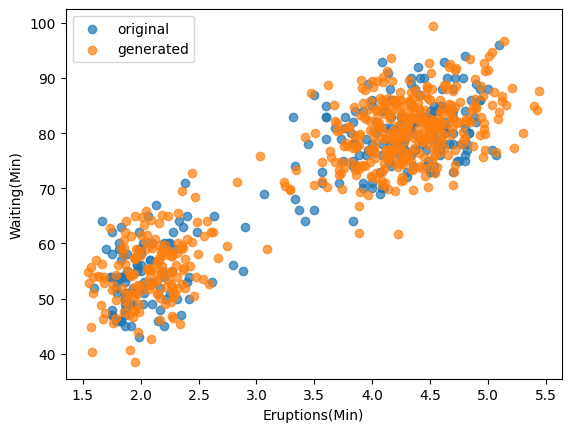

In [ ]:
# @title 5.5.3 Data Generation with GMM

import os
import matplotlib.pyplot as plt

path = 'old_faithful.txt'
original_xs = np.loadtxt(path)

# learned parameters
# mus = np.array([[2.0, 54.50],
#                 [4.3, 80.0]])
# covs = np.array([[[0.07, 0.44],
#                   [0.44, 33.7]],
#                  [[0.17, 0.94],
#                   [0.94, 36.00 ]]])
# phis = np.array([0.35, 0.65])

def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** d * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

def gmm(x, phis, mus, covs):
    K = len(phis)
    y = 0
    for k in range(K):
        phi, mu, cov = phis[k], mus[k], covs[k]
        y += phi * multivariate_normal(x, mu, cov)
    return y

# genearte data
N = 500
new_xs = np.zeros((N, 2))
for n in range(N):
    k = np.random.choice(2, p=phis)
    mu, cov = mus[k], covs[k]
    new_xs[n] = np.random.multivariate_normal(mu, cov)

# visualize
plt.scatter(original_xs[:,0], original_xs[:,1], alpha=0.7, label='original')
plt.scatter(new_xs[:,0], new_xs[:,1], alpha=0.7, label='generated')
plt.legend()
plt.xlabel('Eruptions(Min)')
plt.ylabel('Waiting(Min)')
plt.show()

## Chap 6. Neural Network

In [ ]:
# @title 6.1 Pytorch - tensor
import torch


print(f"torch version : {torch.__version__}")

#
print("\n--torch tensor")
x = torch.tensor(5.0, requires_grad=True) # default value or requires_grad = FALSE
y = 3 * x ** 2
print(y)

y.backward()
print(x.grad)



torch version : 2.6.0+cu124

--torch tensor
tensor(75., grad_fn=<MulBackward0>)
tensor(30.)

--rosebrck function


In [ ]:
# @title 6.1 Pytorch-Gradient

import torch

def rosenbrock(x0, x1):
    y = 100*(x1 - x0 **2)**2 + (x0 - 1)**2
    return y

print("\nTest Rosenbrock function")
x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)
y = rosenbrock(x0, x1)
y.backward()
print(f"x0      : {x0}, x1: {x1}")
print(f"y       : {y}")
print(f"x0.grad : {x0.grad}")
print(f"x1.grad : {x1.grad}")

# Without x0.grad.zero_(), x1.grad.zero_()
x0.data += 1
x1.data += 2
y = rosenbrock(x0, x1)
y.backward()
print("\n Without grad.zero_()")
print(f"x0      : {x0}, x1: {x1}")
print(f"y       : {y}")
print(f"x0.grad : {x0.grad}")
print(f"x1.grad : {x1.grad}")


x0 = torch.tensor(1.0, requires_grad=True)
x1 = torch.tensor(4.0, requires_grad=True)
y = rosenbrock(x0, x1)
y.backward()
print("\n Reinitialize x0 and x1")
print(f"x0      : {x0}, x1: {x1}")
print(f"y       : {y}")
print(f"x0.grad : {x0.grad}")
print(f"x1.grad : {x1.grad}")

# ----
print("\nSoliving Rosenbrock function")
x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)
iters = 10000
lr = 0.001

for i in range(iters):
    # if i % 100 == 0:
    #     print(x0.item(), x1.item())
    y = rosenbrock(x0, x1)
    y.backward()
    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data
    x0.grad.zero_()
    x1.grad.zero_()

print(f"x0 : {x0.item()}")
print(f"x1 : {x1.item()}")




Test Rosenbrock function
x0      : 0.0, x1: 2.0
y       : 401.0
x0.grad : -2.0
x1.grad : 400.0

 Without grad.zero_()
x0      : 1.0, x1: 4.0
y       : 900.0
x0.grad : -1202.0
x1.grad : 1000.0

 Reinitialize x0 and x1
x0      : 1.0, x1: 4.0
y       : 900.0
x0.grad : -1200.0
x1.grad : 600.0

Soliving Rosenbrock function
x0 : 0.9944981336593628
x1 : 0.9890044331550598


0-iter loss:42.828514099121094
20-iter loss:0.1099444180727005
40-iter loss:0.10142753273248672
60-iter loss:0.09642922133207321
80-iter loss:0.09333314746618271
final loss : 0.09149101376533508
====
W = 2.194772481918335
b = 5.452989101409912


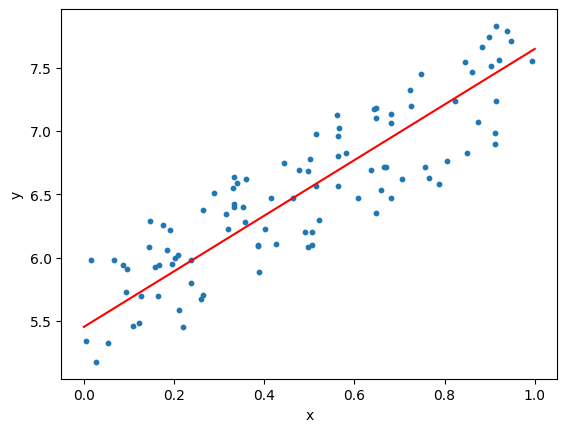

In [ ]:
# @title 6.2 Linear Regression
import torch
import torch.nn.functional as F

torch.manual_seed(0)

x = torch.rand(100, 1)
y = 2 * x + 5 + torch.rand(100, 1)

x = torch.rand(100, 1)
y = 5 + 2 * x + torch.rand(100, 1)

W = torch.zeros((1, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def predict(x):
    y = x @ W + b
    return y

def mean_squared_error(x0, x1):
    diff = x0 - x1
    N = len(diff)
    return torch.sum(diff ** 2) / N

lr = 0.1
iters = 100

for i in range(iters):
    y_hat = predict(x)
    # loss = mean_squared_error(y, y_hat)
    loss = F.mse_loss(y, y_hat)

    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data

    W.grad.zero_()
    b.grad.zero_()

    if i % 20 == 0: # print every 20 iterations
        print(f"{i}-iter loss:{loss.item()}")

print(f"final loss : {loss.item()}")
print('====')
print('W =', W.item())
print('b =', b.item())

import matplotlib.pyplot as plt
plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10)
x = torch.tensor([[0.0], [1.0]])
y = W.detach().numpy() * x.detach().numpy() + b.detach().numpy()
plt.plot(x, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


==Model with Parameter
Parameter containing:
tensor([[0.]], requires_grad=True) torch.Size([1, 1])
Parameter containing:
tensor([0.], requires_grad=True) torch.Size([1])

==Model with Linear layer
Parameter containing:
tensor([[-0.4751]], requires_grad=True) torch.Size([1, 1])
Parameter containing:
tensor([-0.9183], requires_grad=True) torch.Size([1])

==Training Model with Linear layer

0-iter loss:45.458229064941406
20-iter loss:0.08967967331409454
40-iter loss:0.08166984468698502
60-iter loss:0.07739628106355667
80-iter loss:0.07497884333133698


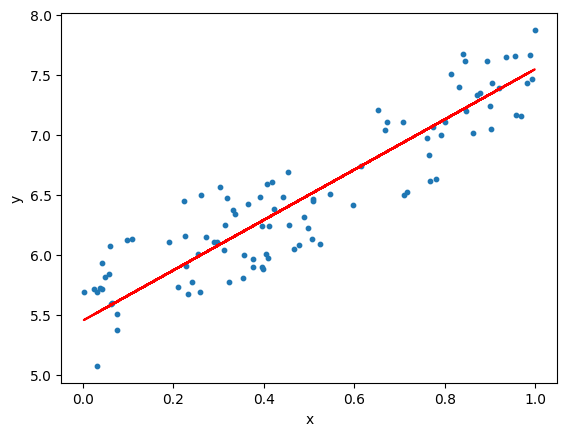

In [ ]:
# @title 6.3 Neural Network - Linear Equation

import torch
import torch.nn as nn

class ModelP(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.W = nn.Parameter(torch.zeros((1, 1)))
        self.b = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        y = x @ self.W + self.b
        return y

print("\n==Model with Parameter")
modelp = ModelP()
for param in modelp.parameters():
    print(param, param.shape)


class ModelN(nn.Module):
    def __init__(self, input_size = 1, output_size = 1) -> None:
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        y = self.linear(x)
        return y

print("\n==Model with Linear layer")
modeln = ModelN()
for param in modeln.parameters():
    print(param, param.shape)


# ----
print("\n==Training Model with Linear layer\n")
x = torch.rand(100, 1)
y = 5 + 2 * x + torch.rand(100, 1)

lr = 0.1
iters = 100

modeln = ModelN()
optimizer = torch.optim.SGD(modeln.parameters(), lr = lr)

for i in range(iters):
    y_hat = modeln(x)
    loss = nn.functional.mse_loss(y, y_hat)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if i % 20 == 0: # print every 20 iterations
        print(f"{i}-iter loss:{loss.item()}")


import matplotlib.pyplot as plt
plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10)
y_hat = modeln(x)
plt.plot(x.detach().numpy(), y_hat.detach().numpy(), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

0-iter lossL:0.5820791125297546, lossNL:0.6861962080001831
1000-iter lossL:0.2419198602437973, lossNL:0.23718556761741638
2000-iter lossL:0.2419198602437973, lossNL:0.23304222524166107
3000-iter lossL:0.2419198602437973, lossNL:0.22301353514194489
4000-iter lossL:0.2419198602437973, lossNL:0.19508163630962372
5000-iter lossL:0.2419198602437973, lossNL:0.13198284804821014
6000-iter lossL:0.2419198602437973, lossNL:0.0872020497918129
7000-iter lossL:0.2419198602437973, lossNL:0.08259838074445724
8000-iter lossL:0.2419198602437973, lossNL:0.0820966437458992
9000-iter lossL:0.2419198602437973, lossNL:0.08179449290037155


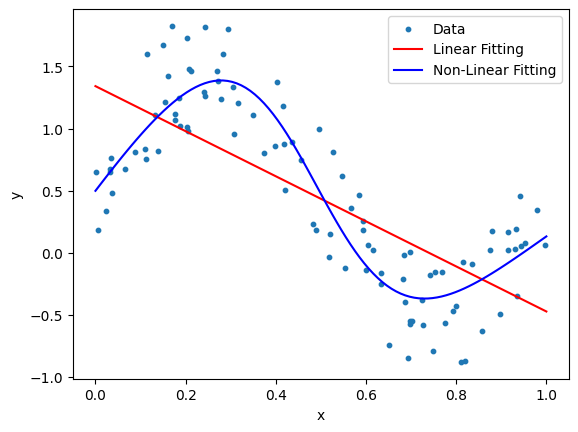

In [ ]:
# @title 6.4 Neural Network Non-Linear Equation

import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(0)
x = torch.rand(100, 1)
y = torch.sin(2* torch.pi * x) + torch.rand(100, 1)


class ModelL(nn.Module):
    def __init__(self, input_size = 1, output_size = 1) -> None:
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        y = self.linear(x)
        return y

class ModelNL(nn.Module):
    def __init__(self, input_size = 1, hidden_size = 10, output_size = 1) -> None:
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        y = self.linear1(x)
        y = F.sigmoid(y)
        y = self.linear2(y)
        return y

lr = 0.2
iters = 10000

modelL = ModelL()
optimizerL = torch.optim.SGD(modelL.parameters(), lr = lr)

modelNL = ModelNL()
optimizerNL = torch.optim.SGD(modelNL.parameters(), lr = lr)

for i in range(iters):
    # Training Linear Model
    yl_hat = modelL(x)
    lossL = F.mse_loss(y, yl_hat)

    lossL.backward()
    optimizerL.step()
    optimizerL.zero_grad()

    # Training Non-Linear Model
    ynl_hat = modelNL(x)
    lossNL = F.mse_loss(y, ynl_hat)

    lossNL.backward()
    optimizerNL.step()
    optimizerNL.zero_grad()

    if i % 1000 == 0: # print every 20 iterations
        print(f"{i}-iter lossL:{lossL.item()}, lossNL:{lossNL.item()}")




import matplotlib.pyplot as plt
plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10, label='Data')

x = torch.linspace(0, 1, 100).reshape(-1, 1)

y_l = modelL(x).detach().numpy()
plt.plot(x, y_l, color='red',label='Linear Fitting')

y_nl = modelNL(x).detach().numpy()
plt.plot(x, y_nl, color='blue',label='Non-Linear Fitting')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



0.21.0+cu124
== Loading with PIL Image
size  : 60000
type  : <class 'PIL.Image.Image'>
lable : 5


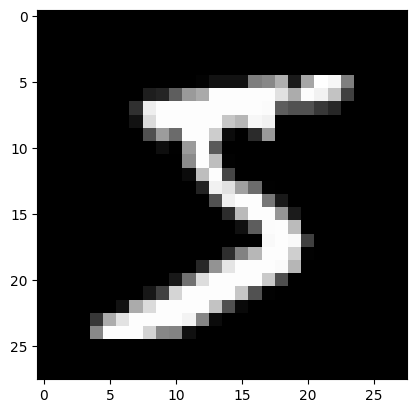


== Loading with torch.Tensor()
size  : 60000
type  : <class 'torch.Tensor'>
lable : 5


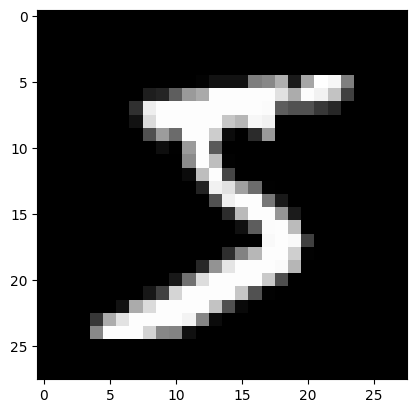


== Data Loader
x shape: torch.Size([32, 1, 28, 28])
label shape: torch.Size([32])


In [ ]:
# @title 6.5 TorchVision
import torchvision
print(torchvision.__version__)

import matplotlib.pyplot as plt

#-------
print("== Loading with PIL Image")
dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
x, label = dataset[0]
print(f"size  : {len(dataset)}")
print(f"type  : {type(x)}")
print(f"lable : {label}")

plt.imshow(x, cmap='gray')
plt.show()

#-------
import torchvision.transforms as T

print("\n== Loading with torch.Tensor()")
dataset = torchvision.datasets.MNIST(root = './data',
                                     train = True,
                                     transform = T.ToTensor(),
                                     download=True)
x, label = dataset[0]
print(f"size  : {len(dataset)}")
print(f"type  : {type(x)}")
print(f"lable : {label}")

img = T.ToPILImage()(x)
plt.imshow(img, cmap='gray')
plt.show()

# ------

print("\n== Data Loader")

dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

# for x, lable in dataloader:
#     print(f"x shape: {x.shape}")
#     print(f"label shape: {lable.shape}")
#     break
x, label = next(iter(dataloader))
print(f"x shape: {x.shape}")
print(f"label shape: {label.shape}")

## Chap 7. Variational Autoencoder (VAE)


In [ ]:
# @title 7.4.2 VAE Model

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms


# hyperparameters
input_dim = 784  # x dimension
hidden_dim = 200  # neurons in hidden layers
latent_dim = 20  # z dimension
epochs = 30
learning_rate = 3e-4
batch_size = 32


class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, hidden_dim)
        self.linear_mu = nn.Linear(hidden_dim, latent_dim)
        self.linear_logvar = nn.Linear(hidden_dim, latent_dim)

    def forward(self, x):
        h = self.linear(x)
        h = F.relu(h)
        mu = self.linear_mu(h)
        logvar = self.linear_logvar(h)
        sigma = torch.exp(0.5 * logvar)
        return mu, sigma


class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super().__init__()
        self.linear1 = nn.Linear(latent_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, z):
        h = self.linear1(z)
        h = F.relu(h)
        h = self.linear2(h)
        x_hat = F.sigmoid(h)
        return x_hat


def reparameterize(mu, sigma):
    eps = torch.randn_like(sigma)
    z = mu + eps * sigma
    return z


class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super().__init__()
        self.encoder = Encoder(input_dim, hidden_dim, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dim, input_dim)

    def get_loss(self, x):
        mu, sigma = self.encoder(x)
        z = reparameterize(mu, sigma)
        x_hat = self.decoder(z)

        batch_size = len(x)
        L1 = F.mse_loss(x_hat, x, reduction='sum')
        L2 = - torch.sum(1 + torch.log(sigma ** 2) - mu ** 2 - sigma ** 2)
        return (L1 + L2) / batch_size

In [ ]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print(device)

cuda


54.07795892130534
45.1565785929362
43.17875786743164
42.09918397827148
41.42119901529948
40.994590096028645
40.65897657063802
40.42798529256185
40.220110740153
40.05618546346029
39.901813958740235
39.803362076822914
39.6932443359375
39.56471435953776
39.48471237182617
39.41481256306966
39.296107391357424
39.26077107747396
39.223576161702475
39.13022763264974
39.07036567993164
39.02487578125
39.001998695882165
38.92082877604167
38.86550018513997
38.83038943684896
38.81009092407226
38.738147017415365
38.75530830078125
38.72335765482585


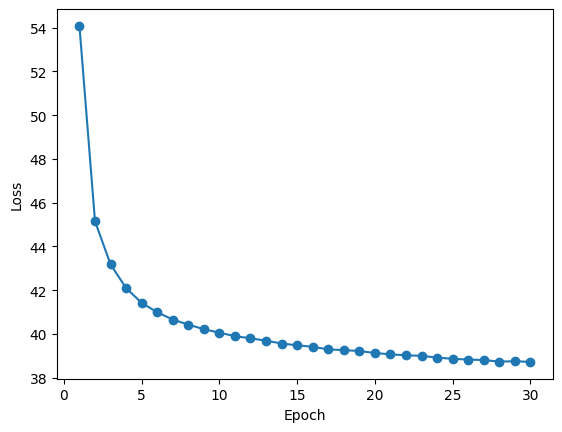

In [ ]:
# @title 7.4.3 VAE traing code

transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Lambda(torch.flatten) # falatten
            ])
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

model = VAE(input_dim, hidden_dim, latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
losses = []

for epoch in range(epochs):
    loss_sum = 0.0
    cnt = 0

    for x, label in dataloader:
        optimizer.zero_grad()
        loss = model.get_loss(x.to(device))
        loss.backward()
        optimizer.step()

        loss_sum += loss.item()
        cnt += 1

    loss_avg = loss_sum / cnt
    print(loss_avg)
    losses.append(loss_avg)

# plot losses
epochs = list(range(1, epochs + 1))
plt.plot(epochs, losses, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

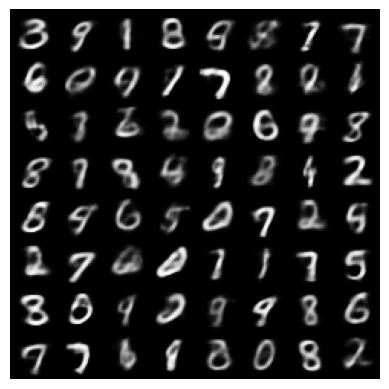

In [ ]:
# @title 7.4.44 Generate new images

# generate new images
with torch.no_grad():
    sample_size = 64
    z = torch.randn(sample_size, latent_dim).to(device)
    x = model.decoder(z)
    generated_images = x.view(sample_size, 1, 28, 28)

grid_img = torchvision.utils.make_grid(generated_images, nrow=8, padding=2, normalize=True)
plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy())
plt.axis('off')
plt.show()

## Chap 9. Diffusion Model

In [ ]:
# @title 9.1


## Chap 10. Conditional Diffusion Model

